In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [6]:
data = pd.read_csv("../../data/Symphony-Data.csv")
data.head()

,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,13-Jun-24,1242.20,1244.0,1260.90,1226.80,154710,1.18%
1,12-Jun-24,1227.70,1210.0,1244.00,1204.00,246676,1.51%
2,11-Jun-24,1209.40,1163.4,1221.00,1157.30,472663,3.96%
3,10-Jun-24,1163.30,1145.0,1169.95,1137.05,157659,1.08%
4,07-Jun-24,1150.85,1108.0,1160.75,1103.70,359926,3.90%


In [7]:
data = data.drop(["OPEN", "HIGH", "LOW", "VOLUME", "CHANGE(%)"], axis=1)
data["DATE"] = pd.to_datetime(data["DATE"], format ="%d-%b-%y")
data = data.sort_values(by="DATE")
data.head()

,DATE,PRICE
1238,2019-06-18,1204.90
1237,2019-06-19,1243.95
1236,2019-06-20,1254.45
1235,2019-06-21,1232.55
1234,2019-06-24,1228.65


In [17]:
y = data["PRICE"]
y.index
y

1238    1204.90
1237    1243.95
1236    1254.45
1235    1232.55
1234    1228.65
         ...   
4       1150.85
3       1163.30
2       1209.40
1       1227.70
0       1242.20
Name: PRICE, Length: 1239, dtype: float64

In [18]:
model = ARIMA(y, order =(5,1,1), seasonal_order=(1,1,1,12))
fit = model.fit()
fcast = fit.forecast(steps=365)

/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmode

Text(0, 0.5, 'Price')

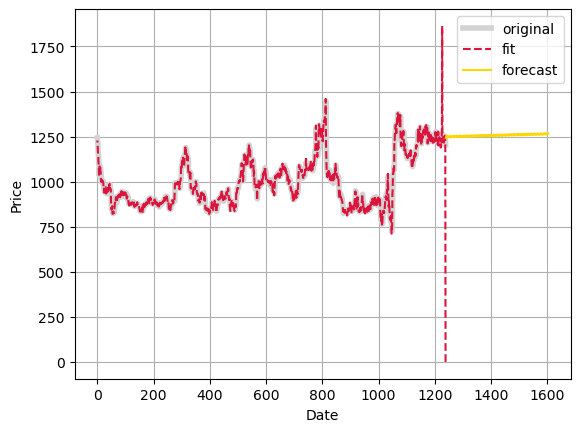

In [21]:
plt.plot(y, label="original", linewidth=4, color="lightgray")
plt.plot(fit.fittedvalues, label="fit", linestyle="--", color="crimson")
plt.plot(fcast, label="forecast", color="gold")
plt.legend()
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price")